<a href="https://colab.research.google.com/github/md-touhidur-rahman/traffic-light-detector/blob/main/Traffic_light_state_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/traffic_light_data/train'


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 64, 64
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1411 images belonging to 4 classes.
Found 350 images belonging to 4 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 classes: back, green, red, yellow
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 474s 10s/step - accuracy: 0.7535 - loss: 0.5628 - val_accuracy: 0.9914 - val_loss: 0.0384
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 287ms/step - accuracy: 0.9927 - loss: 0.0364 - val_accuracy: 0.9943 - val_loss: 0.0199
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 311ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.9943 - val_loss: 0.0231
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.9935 - loss: 0.0244 - val_accuracy: 0.9943 - val_loss: 0.0111
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9943 - val_loss: 0.0078
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - accuracy: 0.9945 - loss: 0.0125 - val_accuracy: 0.9971 - val_loss: 0.0122
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 264ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9971 - val_loss: 0.0085
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accur

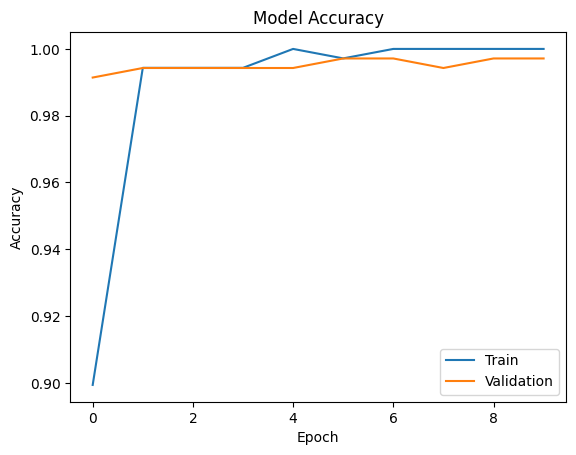

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


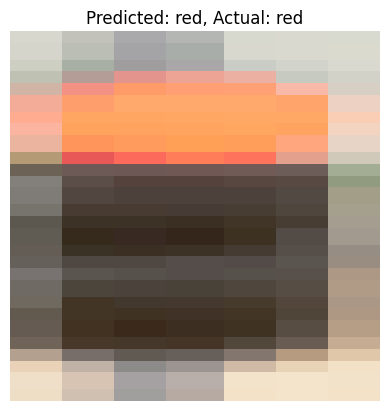

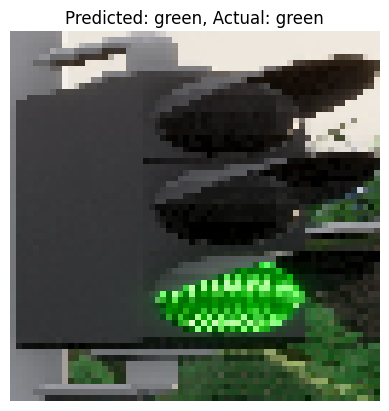

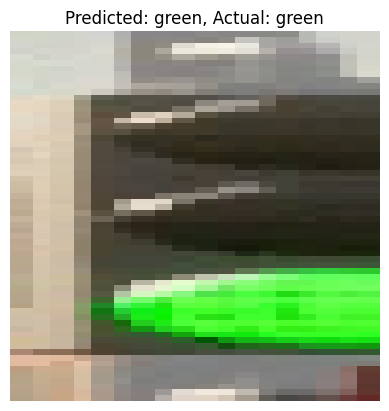

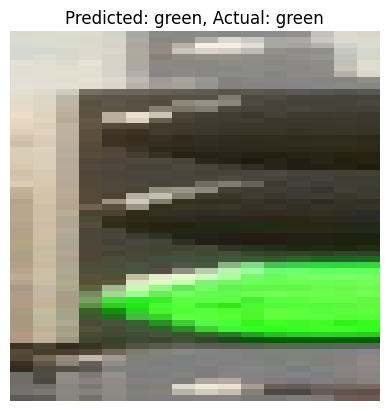

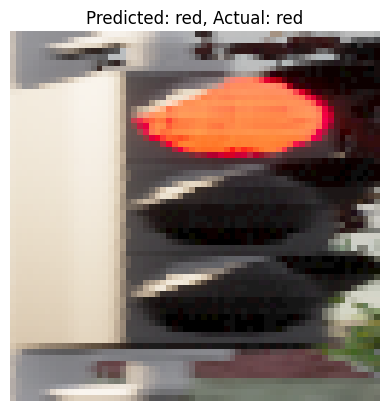

In [9]:
import numpy as np

class_names = list(train_generator.class_indices.keys())

images, labels = next(val_generator)
preds = model.predict(images)

for i in range(5):
    plt.imshow(images[i])
    plt.title(f"Predicted: {class_names[np.argmax(preds[i])]}, Actual: {class_names[np.argmax(labels[i])]}")
    plt.axis('off')
    plt.show()


In [10]:
val_dir = '/content/drive/MyDrive/traffic_light_data/val'


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 64, 64
batch_size = 32

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # important for matching labels during evaluation
)


Found 383 images belonging to 4 classes.


In [12]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"✅ Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"📉 Validation Loss: {val_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.9894 - loss: 0.0660
✅ Validation Accuracy: 99.22%
📉 Validation Loss: 0.0649


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step
Classification Report:
              precision    recall  f1-score   support

        back       0.99      0.99      0.99       100
       green       0.98      1.00      0.99       100
         red       1.00      0.98      0.99       100
      yellow       1.00      1.00      1.00        83

    accuracy                           0.99       383
   macro avg       0.99      0.99      0.99       383
weighted avg       0.99      0.99      0.99       383



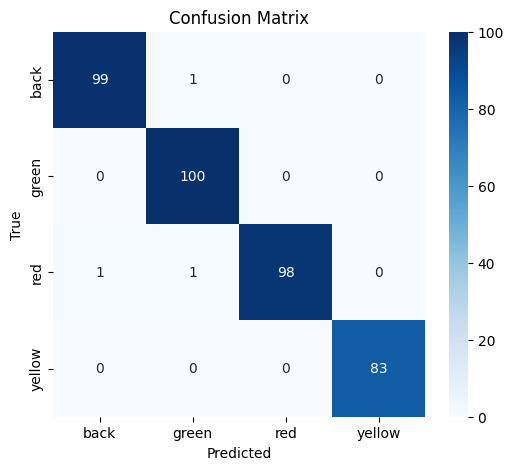

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get ground truth labels
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Get predictions
val_generator.reset()  # make sure predictions align with ground truth
preds = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
predicted_classes = np.argmax(preds, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
